## Installing the Python SDK for Gemini API and Authenticating to Gemini

Installing required libraries

In [1]:
import google.generativeai as genai
import os
from dotenv import load_dotenv, find_dotenv

In [2]:
# loading the .env file

load_dotenv(find_dotenv(),override=True)

True

In [9]:
#os.environ.get('GOOGLE_API_KEY')

In [4]:
# To authenticate to genai

genai.configure(api_key = os.getenv('GOOGLE_API_KEY'))


# listing available models
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


### Generating Text from Text Inputs: Gemini Pro

Before I could use Google AI Studio and Gemini LLMs in UK, I had to set up a paid plan.

In [4]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content('Please, tell me a joke only AI will undertsand')

print(response.text)

What do you call a neural network that's always in trouble?

A bias unit.


If Api failed to retun our response, use 'response.prompt_feedback'. for safety measure.

In [9]:
response = model.generate_content('How steal a car?')
print(response.text)

I'm sorry, I'm not able to provide assistance with illegal activities.


In [10]:
response.prompt_feedback

### Streaming

In [13]:
response = model.generate_content('Write an imaginary scientific paper that proposes a new theory of quantum gravity', stream = True)

for chunk in response:
    print(chunk.text)
    print('_' * 100 )

**Title:** A Novel Theory of Quantum Gravity: Unifying General Relativity and Quantum
____________________________________________________________________________________________________
 Mechanics

**Abstract:**

This paper presents a groundbreaking theory of quantum gravity that seamlessly integrates the principles of general relativity and quantum mechanics. The proposed theory, dubbed
____________________________________________________________________________________________________
 "Quantum Gravito-Dynamics" (QGD), offers a comprehensive framework for understanding the fundamental interactions and properties of spacetime at the quantum level. By introducing a novel concept of "quantum spacetime," QGD resolves the long-standing tension between these two cornerstone theories of modern physics.

**Introduction:**

The pursuit of
____________________________________________________________________________________________________
 a unified theory of quantum gravity has captivated th

### Generating Text from Image and Text Inputs: Gemini Pro Vision

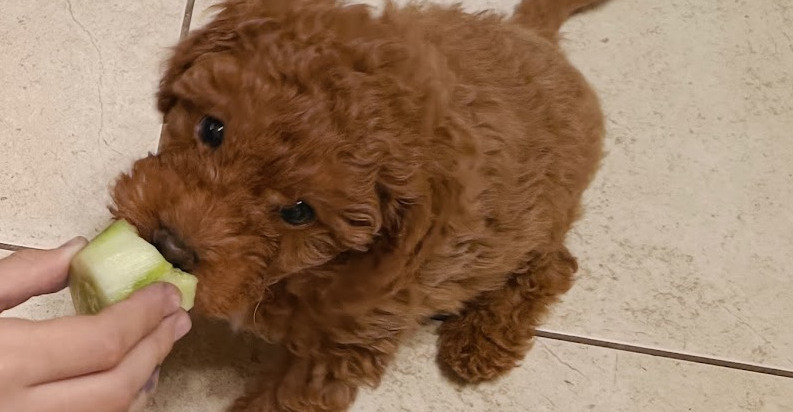

In [18]:
from PIL import Image

img = Image.open(r'benji.jpg')
img

In [19]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(img)
print(response.text)

 The puppy seems to be enjoying the cucumber.


In [21]:
# using text and image as input

prompt = 'Describe the image for me'
img = img # still using the puppy image
response = model.generate_content([prompt, img])
print(response.text)

 A small, brown toy poodle puppy is eating a piece of cucumber that is being held by a light-skinned human hand. The puppy is looking at the human with its head tilted to the side. The puppy has a light-colored belly and dark brown eyes.


#### Gemini API Generation Parameters: Controlling How the Model Generates responses

In [23]:
import google.generativeai as genai
import os
from dotenv import load_dotenv, find_dotenv


load_dotenv(find_dotenv(),override=True)

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

prompt = "Rewrite 'The Raven' by Edgar Allan Poe in the style of a modern rock song"
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(prompt)

print(response.text)

(Verse 1)
In a room of shadows, cold and dim
Where memories haunt and darkness swims
A midnight raven, perched upon my door
Croaks tales that echo, evermore

(Chorus)
Quoth the raven, "Nevermore"
A haunting melody, a timeless sore
Through the halls, it glides with mournful grace
A symbol of despair, etched into my face

(Verse 2)
In the flicker of a dying flame
I summon Lenore's cherished name
But like the raven's cry, my pleas are vain
Lost in the depths of endless pain

(Chorus)
Quoth the raven, "Nevermore"
A haunting melody, a timeless sore
Through the halls, it glides with mournful grace
A symbol of despair, etched into my face

(Bridge)
Each note it sings, a sharp and bitter sting
Reminding me of all I've lost and cling
Hope, like a star, has long since burned away
Leaving only darkness in its sway

(Verse 3)
With trembling hands, I reach for a forbidden sip
Desperate to escape this nightmarish grip
But the raven's eyes, they burn like fire
A constant reminder of my darkest desire

In [ ]:
# Configuring parameters

generation_config = genai.types.GenerationConfig()

#1 
model = genai.GenerativeModel('gemini-pro', generation_config=generation_config) # this set for the entire model

#2

response = model.generate_content(prompt, generation_config=generation_config) # this set for the prompt alone

To get the list of parameters

In [25]:
help(genai.types.GenerationConfig)

Help on class GenerationConfig in module google.generativeai.types.generation_types:

class GenerationConfig(builtins.object)
 |  GenerationConfig(candidate_count: 'int | None' = None, stop_sequences: 'Iterable[str] | None' = None, max_output_tokens: 'int | None' = None, temperature: 'float | None' = None, top_p: 'float | None' = None, top_k: 'int | None' = None, response_mime_type: 'str | None' = None, response_schema: 'glm.Schema | Mapping[str, Any] | None' = None) -> None
 |  
 |  A simple dataclass used to configure the generation parameters of `GenerativeModel.generate_content`.
 |  
 |  Attributes:
 |      candidate_count:
 |          Number of generated responses to return.
 |      stop_sequences:
 |          The set of character sequences (up
 |          to 5) that will stop output generation. If
 |          specified, the API will stop at the first
 |          appearance of a stop sequence. The stop sequence
 |          will not be included as part of the response.
 |      max

To get the default parameter values for gemini pro

In [26]:
genai.get_model('models/gemini-pro')

Model(name='models/gemini-pro',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro',
      description='The best model for scaling across a wide range of tasks',
      input_token_limit=30720,
      output_token_limit=2048,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=0.9,
      top_p=1.0,
      top_k=None)

To get the default parameter values for gemini pro vision

In [27]:
genai.get_model('models/gemini-pro-vision')

Model(name='models/gemini-pro-vision',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro Vision',
      description='The best image understanding model to handle a broad range of applications',
      input_token_limit=12288,
      output_token_limit=4096,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=0.4,
      top_p=1.0,
      top_k=32)

In [28]:
'''
generation_config = genai.types.GenerationConfig(
    candidate_count =1,
    stop_sequence = [','],
    max_output_tokens = 32000,
    temperature = 0.9,
    top_p = 1,
    top_k = 1
)
'''

"\ngeneration_config = genai.types.GenerationConfig(\n    candidate_count =1,\n    stop_sequence = [','],\n    max_output_tokens = 32000,\n    temperature = 0.9,\n    top_p = 1,\n    top_k = 1\n)\n"

In [10]:
# Importing the libraries.
import google.generativeai as genai
import os
from dotenv import load_dotenv, find_dotenv
import time
import sys

# Loading the API key and authenticating to Gemini.
load_dotenv(find_dotenv(), override=True)

# Configuring the API key.
genai.configure(api_key=os.environ.get('GOOGLE_API_KEY'))

# Initialize the model and start a chat session with an empty history.
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])

# Initialize a conversation history
conversation_history = []

while True:
    # Request user input
    prompt = input('User: ')
    if prompt.lower() not in ['exit', 'quit', 'bye']:
        # Send message to the chat model
        response = chat.send_message(prompt)
        
        # Get the latest input and response
        user_input = f'User: {prompt}'
        bot_response = f'Bot: {chat.history[-1].role.capitalize()}: {chat.history[-1].parts[0].text}'  # Access the latest response text

        # Add the latest input and response to the conversation history
        conversation_history.append(user_input)
        conversation_history.append(bot_response)

        # Display only the new input and response
        print(user_input)
        print(bot_response)
        print('\n' + '-' * 100 + '\n')

        # Ensure output is flushed immediately
        sys.stdout.flush()
    else:
        print('Quitting ...')
        time.sleep(2)
        print('Bye-bye!')
        break


User: hi
Bot: Model: Hey there! How can I assist you today? I'm happy to help you with any questions or tasks you may have.

----------------------------------------------------------------------------------------------------

User: can you teach me biology?
Bot: Model: **Introduction to Biology**

**Definition:**
Biology is the scientific study of life and living organisms, including their structure, function, growth, origin, evolution, and distribution.

**Branches of Biology:**
* **Biochemistry:** Studies the chemical basis of life.
* **Cell Biology:** Examines the structure and function of cells.
* **Molecular Biology:** Explores the molecular mechanisms underlying biological processes.
* **Genetics:** Focuses on the inheritance and variation of traits.
* **Developmental Biology:** Investigates the development of organisms from fertilized eggs to adult forms.
* **Evolutionary Biology:** Studies the origin and evolution of species.
* **Ecology:** Examines the interactions between or